In [14]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import string
import matplotlib.cm as cm
import os
import scipy

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['poly']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


##Seccion 12.1

###Ejercicio 1-FFT

En el siguiente bloque se genera la función a la que posteriormente se aplica la transformada de Fourier. después se genera la transformada de esta función para recrear la función original

In [15]:
L=20
n=128
x2=np.linspace(-L/2,L/2,n)
x=x2[0:n]
u=np.exp(-x*x)
ut=np.fft.fft(u)
utshift=np.fft.fftshift(ut)

A continuación se grafican en orden la función original, la parte real de la función transformada, la parte real de la función nuevamente transformada a sus valores matemáticos originales y el valor absoluto de esta.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


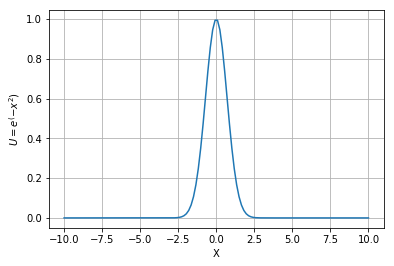

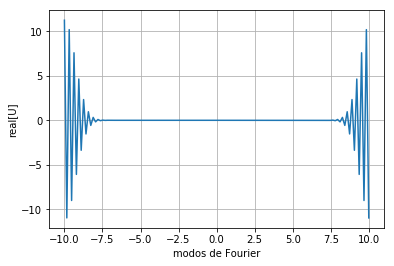

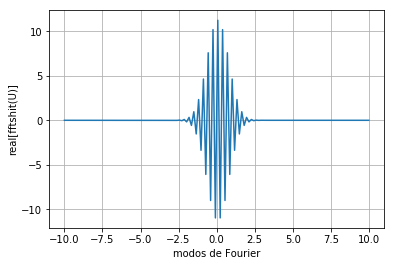

<function matplotlib.pyplot.show>

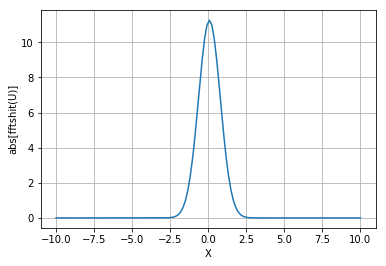

In [16]:
plt.figure(1)
plt.plot(x,u)
plt.grid()
pylab.ylabel("$U=e^(-x^2)$")
pylab.xlabel("X")
plt.show

plt.figure(2)
plt.plot(x2,ut)
pylab.ylabel("real[U]")
pylab.xlabel("modos de Fourier")
plt.grid()
plt.show

plt.figure(3)
plt.plot(x2,utshift)
pylab.ylabel("real[fftshit(U)]")
pylab.xlabel("modos de Fourier")
plt.grid()
plt.show()                 

plt.figure(4)
plt.plot(x,abs(utshift))
plt.grid()
pylab.ylabel("abs[fftshit(U)]")
pylab.xlabel("X")
plt.show

###Ejercicio 2-FFT vs diferencias finitas

El siguiente código esta generado con el fin de calcular la primera y segunda derivada de una función mediante el método de FFT y comparar su resultado respecto a la derivada analítica y la derivada obtenida por el método de elementos diferencias finitas, en la primera sección se genera la función a derivar al igual que los vectores con los distintos modos de Fourier.

En la segunda sección se realizan las derivaciones por el método de FFT y también se generan los vectores con las derivadas analíticas de la función. En la tercera sección se realiza la primera derivada por el método de diferencias finitas de segundo y cuarto orden para finalmente graficar los resultados.

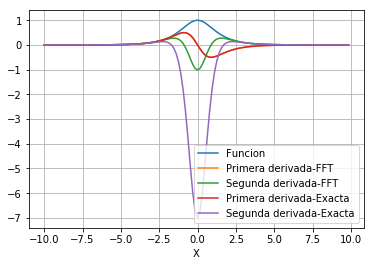

In [17]:

#Seccion 1:
L=20
n=128
x2=np.linspace(-L/2,L/2,n+1)
x=x2[0:n]
dx=x[1]-x[0]
u=1/np.cosh(x)
ut=np.fft.fft(u)
arr1=np.linspace(0,((n/2)-1),64)
arr2=np.linspace(((-n/2)-1),-1,64)
arreg=np.concatenate((arr1,arr2),axis=0)
k=(2*scipy.pi/L)*arreg


#Seccion 2-FFT calculation of derivatives:
ut1=1j*k*ut
ut2=-k*k*ut
u1=np.real(np.fft.ifft(ut1))
u2=np.real(np.fft.ifft(ut2))
u1exact=(-1/np.cosh(x))*np.tanh(x)
u2exact=(1/np.cosh(x))-((2/np.cosh(x))**3)
#Finite difference calculation of first derivative

#Seccion 3:
#2nd-order accurate
ux=[]
ux.append((-3*u[0]+4*u[1]-u[2]/(2*dx)))
longit=(np.linspace(1,n-2,126)).astype(int)
for j in longit:
 ux.append((u[j+1]-u[j-1])/(2*dx))
ux.append((3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx));

#4th-order accurate
ux2=[]
ux2.append((-3*u[0]+4*u[1]-u[2])/(2*dx))
ux2.append((-3*u[1]+4*u[2]-u[3])/(2*dx))
longit2=(np.linspace(2,n-3,124)).astype(int)
for j in longit2:
 ux2.append((-u[j+2]+8*u[j+1]-8*u[j-1]+u[j-2])/(12*dx))
ux2.append((3*u[n-2]-4*u[n-3]+u[n-4])/(2*dx))      
ux2.append((3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx))


plt.figure(1)
plt.plot(x,u,label='Funcion')
plt.plot(x,u1,label='Primera derivada-FFT')
plt.plot(x,u2,label='Segunda derivada-FFT')
plt.plot(x,u1exact,label='Primera derivada-Exacta')
plt.plot(x,u2exact,label='Segunda derivada-Exacta')
pylab.legend(loc='lower right') 
pylab.xlabel("X")
plt.grid()
plt.show()       


En la gráfica anterior es posible observar que tanto el método de diferencias finitas tanto de segundo como de cuarto orden y FFT presentan un valor cercano a la primera derivada encontrada analíticamente. Adicionalmente se observa que la segunda derivada obtenida por el método de FFT  también se aproxima significativamente a la función obtenida analíticamente.

##Seccion 12.2

###Ejercicio 1-Señal con ruido

El código presentado a continuación se implementa para generar una función con ruido que posteriormente pueda ser usada para analizar filtros de señales. Para esto se construye una función la cual se transforma mediante la función FFT, a la cual posteriormente se le agrega ruido mediante un numero aleatorio entre 0 y 1 y después se convierte nuevamente a una función respecto al tiempo.

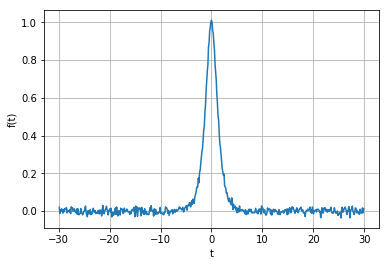

In [18]:
L=30
n=512
t2=np.linspace(-L,L,n+1)
t=t2[0:n]
arr1=np.linspace(0,((n/2)-1),256)
arr2=np.linspace(((-n/2)-1),-1,256)
arreg=np.concatenate((arr1,arr2),axis=0)
k=(2*scipy.pi/(2*L))*arreg
u=1/np.cosh(t)
noise=1;
ut=np.fft.fft(u)
utn=ut+noise*(np.random.rand(n)+(1j*np.random.rand(n)))
un=np.fft.ifft(utn)



plt.figure(1)
plt.plot(t[1:],np.real(un[1:]))
pylab.xlabel("t")
pylab.ylabel("f(t)")
plt.grid()
plt.show()  

###Ejercicio 2-Filtro 

El siguiente ejercicio tiene como objetivo mostrar la utilidad de las funciones FFT en conjunto con los filtros gaussianos. Para esto se utiliza la función con ruido generada en el punto anterior para aplicarle un filtro gaussiano centrado en la frecuencia media. Después de haber aplicado este filtro a las frecuencias dadas por la transformada de Fourier estas se convierten nuevamente al dominio en el tiempo y se grafican comparándolas con la función original y la función con ruido antes del filtro.

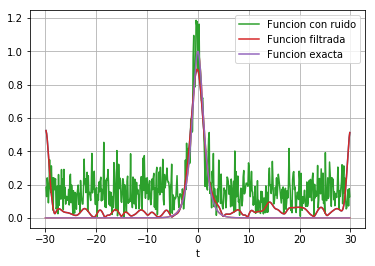

In [19]:
noise=10;
unt=ut+noise*(np.random.rand(n)+(1j*np.random.rand(n)))
un=np.fft.ifft(unt);


fil=np.exp(-0.2*(k)**2);
unft=fil*unt;
unf=ifft(unft);
plot(t[1:],abs(unf)[1:])
plot(t,u)

plt.figure(1)
plot(t[1:],abs(un)[1:],label='Funcion con ruido')
plot(t[1:],abs(unf)[1:],label='Funcion filtrada')
plot(t,u,label='Funcion exacta')
pylab.legend(loc='upper right') 
pylab.xlabel("t")
plt.grid()
plt.show()     


##Seccion 12.3

###Ejercicio 1-Radar

con el propósito de observar una aplicación práctica de la transformada rápida de Fourier en el siguiente código se plantea su uso en la detección de señales en un radar. 

la primera parte del siguiente código genera señales con ruido usando el promedio de 1, 2, 5 y 20 tomas de datos con lo que se busca mostrar el uso de un promedio para reducir el ruido de una señal.

la segunda parte genera un código de las funciones ideales que presentaría un radar para un avión acercándose con un movimiento oscilatorio, y la tercera parte presenta estos mismos datos pero añadiéndoles ruido a los datos.


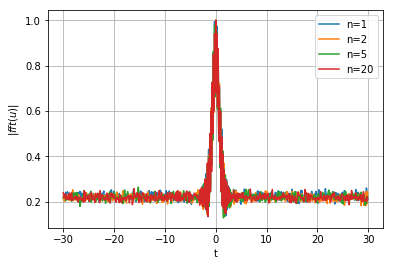

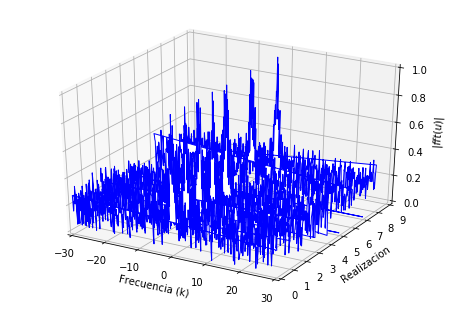

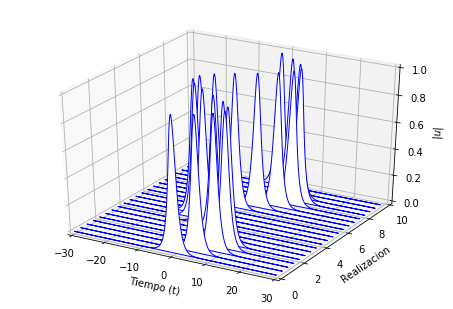

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: ComplexWarning: Casting complex values to real discards the imaginary part
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:104: ComplexWarning: Casting complex values to real discards the imaginary part


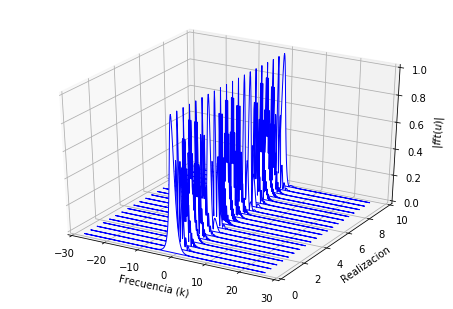

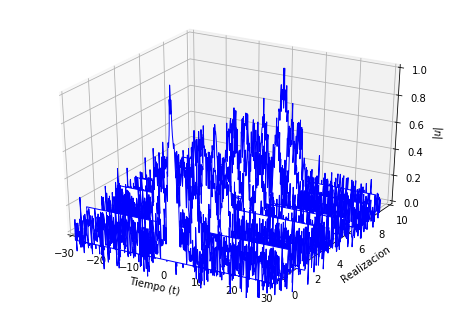

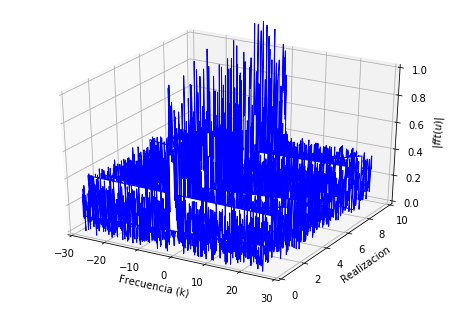

In [20]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
from matplotlib.collections import PolyCollection

##primera parte:
L=30
n=512
t2=np.linspace(-L,L,n+1)
t=t2[0:n]
arr1=np.linspace(0,((n/2)-1),256)
arr2=np.linspace(((-n/2)-1),-1,256)
arreg=np.concatenate((arr1,arr2),axis=0)
k=(2*scipy.pi/(2*L))*arreg
ks=np.fft.fftshift(k)
noise=10
ave = numpy.zeros(shape=(4,n))
dat = numpy.zeros(shape=(100,n))

realize=[1,2,5,100];
tamanio=[0,1,2,3]
for jj in tamanio:
 u=1/np.cosh(t); 
 ut=np.fft.fft(u)
 actual=realize[jj]
 vectorj=(np.linspace(0,actual-1/actual)).astype(int)
 aveactual=np.zeros(n)
 for j in vectorj:
  utn=ut+noise*(np.random.rand(n)+(1j*np.random.rand(n)))
  aveactual=aveactual+utn
  dat[j]=abs(np.fft.fftshift(utn))/max(abs(utn));
 ave[jj]=abs((np.fft.fftshift(aveactual))/realize[jj])

plt.figure(1)
plot(t,ave[0]/max(ave[0]),label='n=1')
plot(t,ave[1]/max(ave[1]),label='n=2')
plot(t,ave[2]/max(ave[2]),label='n=5')
plot(t,ave[3]/max(ave[3]),label='n=20')
pylab.legend(loc='upper right')
pylab.xlabel('Frecuencia (k)')
pylab.ylabel('$|fft(u)|$')
pylab.xlabel("Frecuenciaa")
pylab.xlabel("t")
plt.grid()
plt.show()     


##segunda parte
slc = np.arange(0, 9, 1)
verts = []
for i in slc:
  verts.append(list(zip(t,dat[i,:])))

fig=plt.figure()
ax = Axes3D(fig)
poly = PolyCollection(verts, facecolors=(1,1,1,1), edgecolors=(0,0,1,1))
ax.add_collection3d(poly, zs=slc, zdir='y')
ax.set_xlim(-30,30)
ax.set_ylim(0,9)
ax.set_xlabel('Frecuencia (k)')
ax.set_ylabel('Realizacion')
ax.set_zlabel('$|fft(u)|$')
ax.set_zlim(0,1)
pyplot.show()


##tercera parte
slc = np.arange(0, 10, 0.5)
T, S = np.meshgrid(t, slc)
K, S = np.meshgrid(k, slc)
U = 1./np.cosh(T - 10. * np.sin(S)) * np.exp(1j * 0. * T)
nslices=len(slc)


verts2 = []
for i in range(nslices):
  verts2.append(list(zip(T[i], U.real[i])))
fig2=plt.figure()
ax2 = Axes3D(fig2)
poly2 = PolyCollection(verts2, facecolors=(1,1,1,1), edgecolors=(0,0,1,1))
ax2.add_collection3d(poly2, zs=slc, zdir='y')
ax2.set_xlim(-30,30)
ax2.set_xlabel('Tiempo (t)')
ax2.set_ylabel('Realizacion')
ax2.set_zlabel('$|u|$')
ax2.set_ylim(0,10)
ax.set_zlim(0,1)
pyplot.show()

Ut = numpy.zeros(shape=(20,n))
Kp = numpy.zeros(shape=(20,n))
Utp = numpy.zeros(shape=(20,n))
Utn = numpy.zeros(shape=(20,n))
Utnp = numpy.zeros(shape=(20,n))
Un = numpy.zeros(shape=(20,n))
noise=10
tamanio=(np.linspace(0,19,20)).astype(int)

for j in tamanio:
 Ut[j]=np.fft.fft(U[j])
 Kp[j]=np.fft.fftshift(K[j])
 Utp[j]=np.fft.fftshift(Ut[j])
 Utn[j]=Ut[j]+noise*(np.random.rand(n)+(1j*np.random.rand(n)));
 Utnp[j]=np.fft.fftshift(Utn[j])/max(abs(Utn[j]));
 Un[j]=np.fft.ifft(Utn[j]);

    
verts3 = []
for i in range(nslices):
  verts3.append(list(zip(k, abs(Ut[i])/max(abs(Ut[i])))))

fig3=plt.figure()
ax3 = Axes3D(fig3)
poly3 = PolyCollection(verts3, facecolors=(1,1,1,1), edgecolors=(0,0,1,1))
ax3.add_collection3d(poly3, zs=slc, zdir='y')
ax3.set_xlim(-30,30)
ax3.set_ylim(0,10)
ax3.set_zlim(0,1)
ax3.set_xlabel('Frecuencia (k)')
ax3.set_ylabel('Realizacion')
ax3.set_zlabel('$|fft(u)|$')
pyplot.show()
verts4 = []
for i in range(nslices):
  verts4.append(list(zip(T[i,1:],Un[i,1:])))

fig4=plt.figure()
ax4 = Axes3D(fig4)
poly4 = PolyCollection(verts4, facecolors=(1,1,1,1), edgecolors=(0,0,1,1))
ax4.add_collection3d(poly4, zs=slc, zdir='y')
ax4.set_xlim(-30,30)
ax4.set_ylim(0,10)
ax4.set_zlim(0,1)
ax4.set_xlabel('Tiempo (t)')
ax4.set_ylabel('Realizacion')
ax4.set_zlabel('$|u|$')
pyplot.show()


verts5 = []
for i in range(nslices):
  verts5.append(list(zip(k[1:], abs(Utn[i,1:])/max(abs(Ut[i,1:])))))

fig5=plt.figure()
ax5 = Axes3D(fig5)
poly5 = PolyCollection(verts5, facecolors=(1,1,1,1), edgecolors=(0,0,1,1))
ax5.add_collection3d(poly5, zs=slc, zdir='y')
ax5.set_xlim(-30,30)
ax5.set_ylim(0,10)
ax5.set_zlim(0,1)
ax5.set_xlabel('Frecuencia (k)')
ax5.set_ylabel('Realizacion')
ax5.set_zlabel('$|fft(u)|$')
pyplot.show()


en las gráficas anteriores es posible apreciar como a medida que se aumenta el número de muestreos utilizados para calcular el promedio de una señal se disminuye el ruido que presenta esto.

también podemos observar que a pesar de que el avión se mueva con el movimiento oscilatorio descrito y que a esta señal se le agregue ruido el mapa de frecuencias se mantendrá constante.

#Ejercicio practico
##ejemplificacion del teorema de Nyquist

Con este ejemplo se desea mostrar la validez del teorema de Nyquist. supongamos que un objeto tiene un movimiento circular a una cierta velocidad angular dada por una frecuencia de oscilacion como se muestra en la siguiente grafica:

<img src="graf0.png">

un posible metodo experimental para determinar la frecuencia de oscilacion y reproducir el movimiento del objeto seria medir su posicion respecto a alguno de los ejes coordenados obteniendo una grafica sinusoidal respecto al tiempo de la cual se puede extraer la frecuencia mas significativa usando la funcion FFT. 

sin embargo el teorema de Nyquist plantea que para poder realizar una correcta recontruccion del movimiento y obtener la frecuencia indicada la frecuencia a la cual se mida la posicion del objeto debe ser mayor a dos veces la frecuencia de movimiento de este. para apreciar este comportamiento se simulara el muestreo a diferentes frecuencias de un objeto rotando a una velocidad de 5 RPM. para esto se utiliza el siguiente codigo 

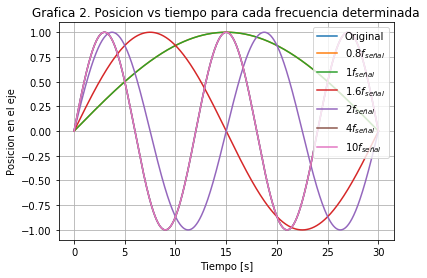

In [39]:
L=60# se define la cantidad total de segundos 
muestras=[4,5,8,10,20,50]# se define un vector con la cantidad de datos tomados en un minuto
listafrec=[]#se define una lista donde se guardara la frecuencia principal observada del sistema
magnitudes=[]#se define una lista donde se guardara los arreglos de magnitues para cada frecuencia de muestreo
frecuencias=[]#se define una lista donde se guardara los arreglos de frecuencias para cada frecuencia de muestreo
for n in muestras:
 fremuestr=n/L#se determina la frecuencia de muestreo actual
 x=np.linspace(0,L,n)#se genera un vector con la cantidad de datos actuales en el tiempo total
 u=np.sin(x*(2*np.pi)/12)#se genera el vector de datos obtenidos de posicion para la frecuencia de muestreo actual
 ut=np.fft.fft(u)#se aplica la funcion FFT
 freq=np.fft.fftfreq(n)#se determina la fraccion correspondiente de la frecuencia de muestreo asociado a cada modo de Fourier
 freq=freq[0:int(n/2)]*fremuestr#se determinan las frecuencias reales de cada modo de Fourier
 magnitud=abs(ut[0:int(n/2)])#se determina la magnitud de cada modo de Fourier
 magnitudes.append(magnitud/max(magnitud))#se guarda el arreglo de magnitudes normalizadas para cada frecuencia de muestreo
 frecuencias.append(freq)#se guarda el arreglo de frecuencias para cada frecuencia de muestreo
 frecmax=0#el for siguiente determina la frecuencia con la magnitud normalizada maxima
 magin=0
 for frecact,magact in zip(freq,magnitud):
    if magact>magin:
        magin=magact
        frecmax=frecact
 listafrec.append(frecmax)#se guarda la frecuencia con magnitud normalzada maxima de cada frecuencia de muestreo

# se generan las señales observadas con las frecuencias obtenidas del metodo aplicado
t=np.linspace(0,30,10000) 
uoriginal=np.sin(t*(2*np.pi)/12)
uobtenidas=[]
for i in listafrec:
  uactual=np.sin(t*(2*np.pi)*i)
  uobtenidas.append(uactual)

# se grafican los resultados obtenidos
plt.plot(frecuencias[0],magnitudes[0],label='$0.8 f_{señal}$')
plt.plot(frecuencias[1],magnitudes[1],label='$ 1 f_{señal}$')
plt.plot(frecuencias[2],magnitudes[2],label='$1.6 f_{señal}$')
plt.plot(frecuencias[3],magnitudes[3],label='$2 f_{señal}$')
plt.plot(frecuencias[4],magnitudes[4],label='$4 f_{señal}$')
plt.plot(frecuencias[5],magnitudes[5],label='$10 f_{señal}$')
plt.xlim((0,0.12))
plt.legend(loc='upper right')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('$|fft(u)|/max(|fft(u)|)$')
plt.title('Grafica 1. Amplitud normalizada de FFT(U) vs frecuencia')
grid()
pylab.savefig(os.path.join('graf1.png'), dpi=600)
plt.close()

plt.plot(t,uoriginal,label='Original')
plt.plot(t,uobtenidas[0],label='$0.8 f_{señal}$')
plt.plot(t,uobtenidas[1],label='$1 f_{señal}$')
plt.plot(t,uobtenidas[2],label='$1.6 f_{señal}$')
plt.plot(t,uobtenidas[3],label='$2 f_{señal}$')
plt.plot(t,uobtenidas[4],label='$4 f_{señal}$')
plt.plot(t,uobtenidas[5],label='$10 f_{señal}$')
plt.legend(loc='upper right')
plt.xlabel('Tiempo [s]')
plt.ylabel('Posicion en el eje')
plt.title('Grafica 2. Posicion vs tiempo para cada frecuencia determinada')
grid()
pylab.savefig(os.path.join('graf2.png'), dpi=600)


El histograma de frecuencias se presenta a continuación.

<img src="graf1.png">

cómo se puede observar en la gráfica 1 para aquellas frecuencias de muestreo inferiores a dos veces la frecuencia del movimiento el histograma no alcanza a cubrir hasta la frecuencia del movimiento y por tanto los picos del histograma se presentan en valores que generarían señales distintas a las que se desea recrear.

por otro lado, cuando la frecuencia de muestreo es mayor a 2 veces la frecuencia del movimiento el histograma siempre presenta un pico máximo en el valor de la frecuencia del movimiento sin importar cuál es la frecuencia de muestreo, siendo este el motivo de que para estas frecuencias de muestreo se pueda obtener la gráfica de la señal tal como se ve en la gráfica 2.

<img src="graf2.png">

de la gráfica 2 se puede apreciar como para valores de frecuencias de muestreo menores a 2 $f_{señal}$ el movimiento reconstruido aparenta tener una frecuencia menor a la real del movimiento, este comportamiento también se observa que incluso para una frecuencia de muestreo igual a 2 $f_{señal}$.

En la misma grafica se puede ver que para las frecuencias de muestreo que son superiores a 2 veces $f_{señal}$ las señales reconstruidas coinciden completamente con la señal original de la posición de la partícula.

con esto es posible apreciar la validez del teorema de teorema de Nyquist y la importancia de escoger frecuencias de muestreo adecuadas al realizar un experimento buscando determinar correctamente su comportamiento en el tiempo.


